In [1]:
import math
import numpy as np
import seaborn as sns
import pandas as pd
import scipy
import scipy.sparse.csgraph
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.neighbors import kneighbors_graph
import networkx as nx
from sklearn.cluster import SpectralClustering
%matplotlib inline

In [2]:
iris = pd.read_csv('iris.csv', header = None)
iris

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


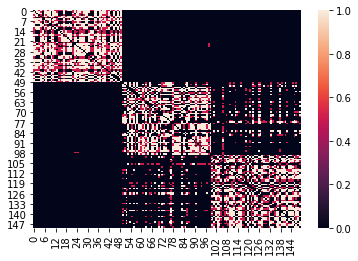

In [3]:
# creating graph with 10 neareste neighbors

m = 30
k = 3
gamma = 1.0

#x = iris['sepal_length sepal_width petal_length petal_width'.split()]
x = iris[[0, 1, 2, 3]]
A = kneighbors_graph(x, m)
A = 0.5 * (A + A.T)

g = nx.from_scipy_sparse_matrix(A)

# matriz de similaridades
A = A.todense()
fig = sns.heatmap(A)




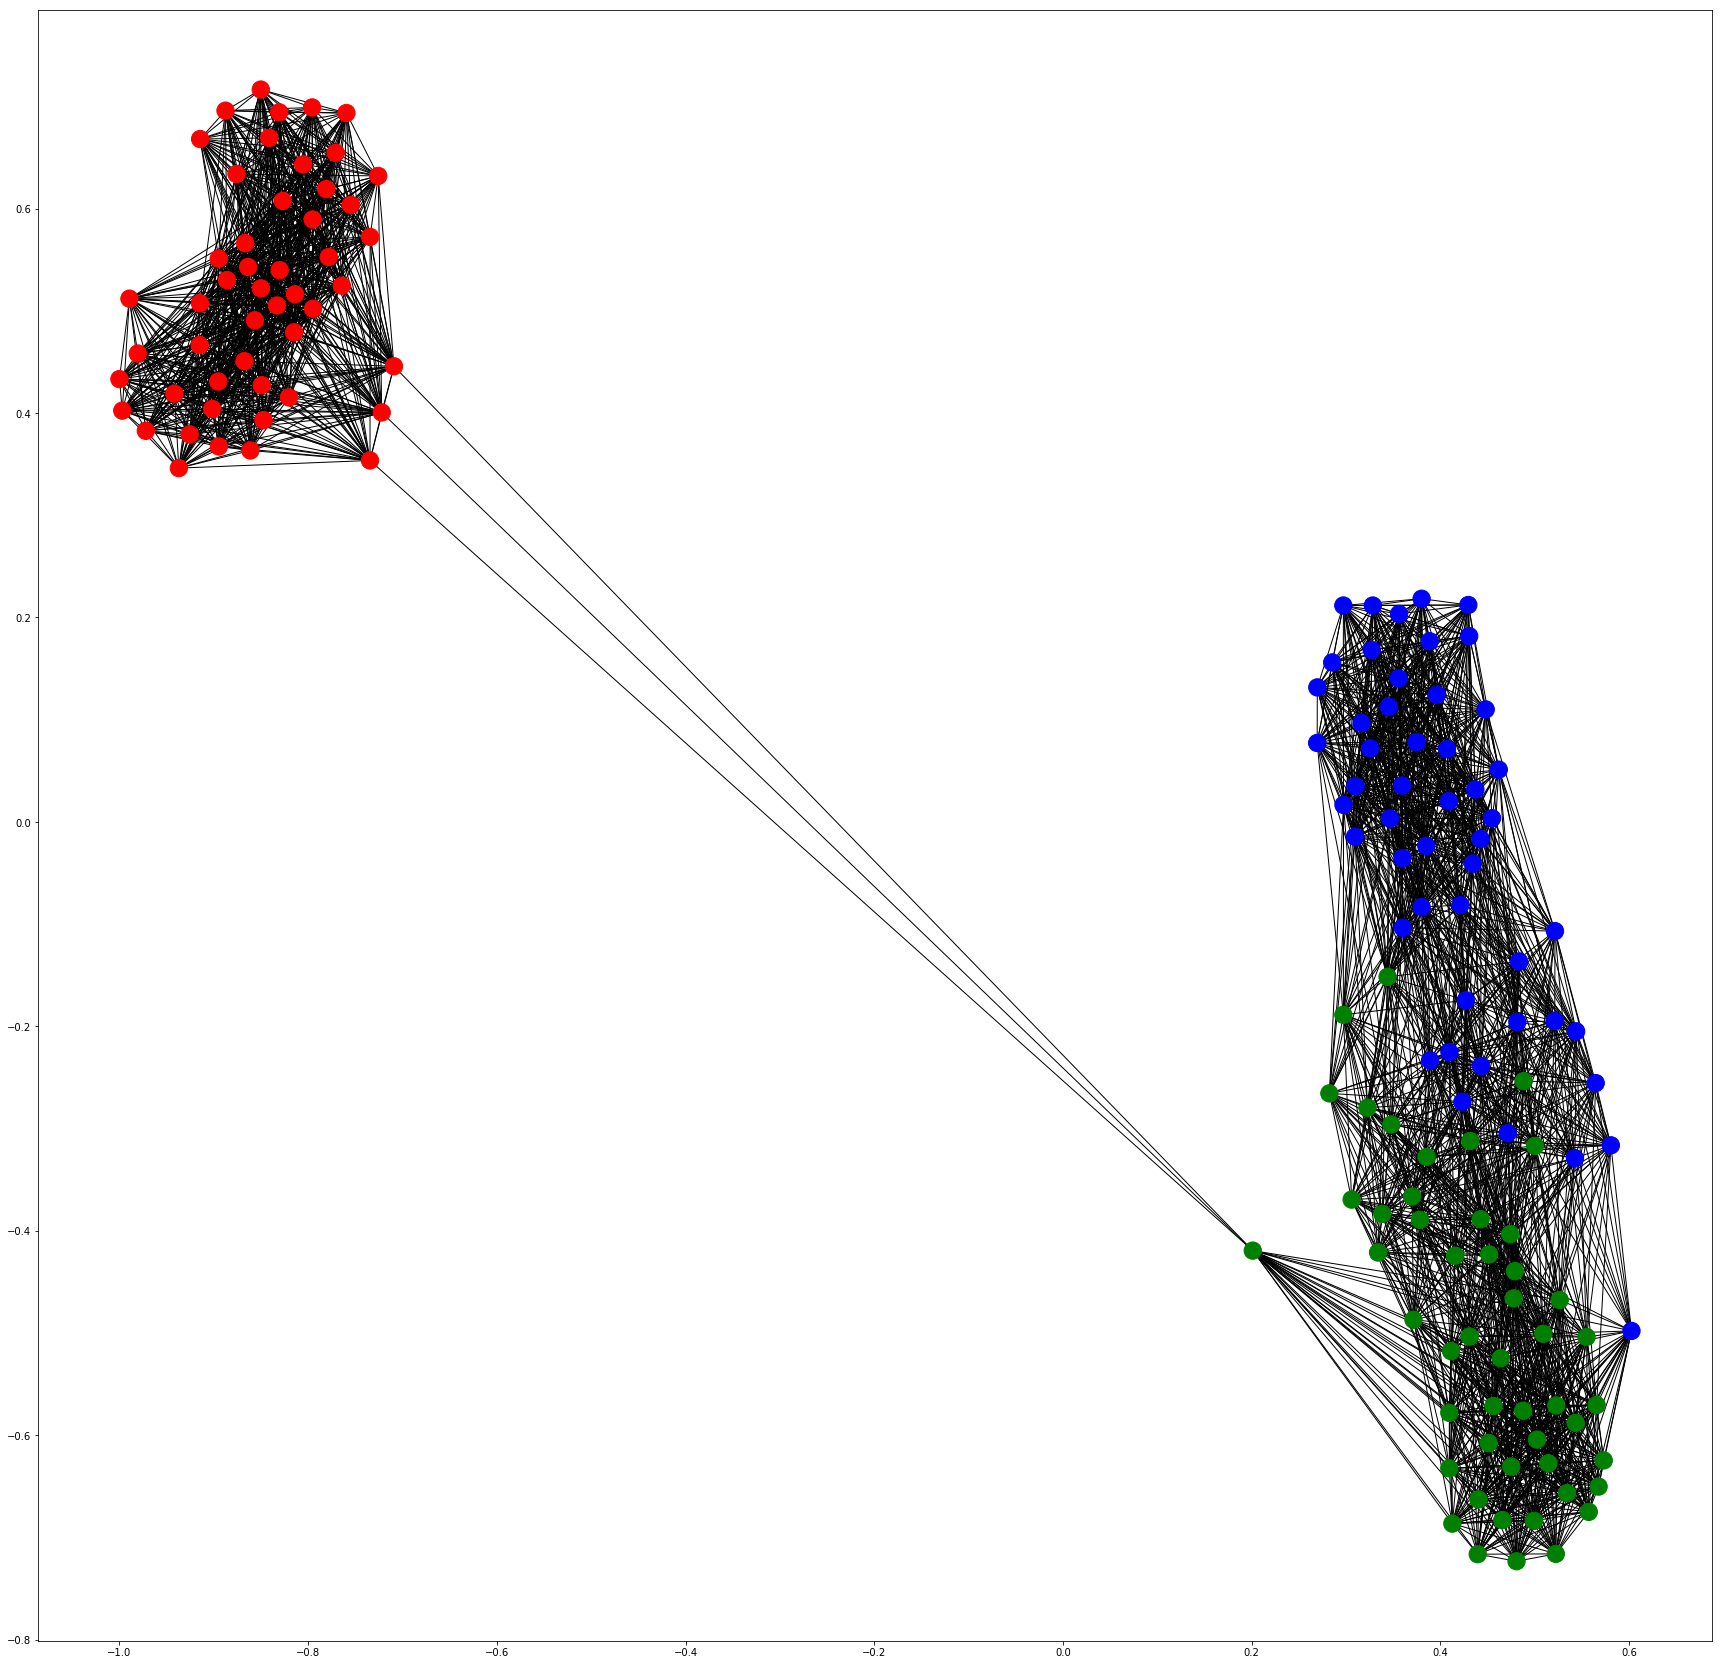

In [4]:
fig = plt.figure(figsize = (30, 30))
def getColor(s):
    if s == 0:
        return 'red'
    elif s == 1:
        return 'green'
    else:
        return 'blue'
def getSize(s):
    if s == 0:
        return 400
    elif s == 1:
        return 600
    else:
        return 200
colors = [getColor(w) for w in iris[4]]
nx.draw_networkx(g, node_color = colors, with_labels = False)

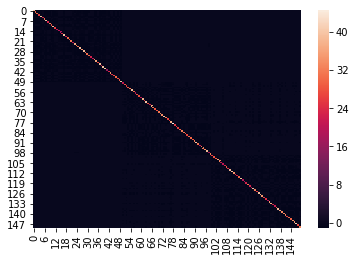

In [5]:
L = scipy.sparse.csgraph.laplacian(A, normed = False)
fig = sns.heatmap(L)

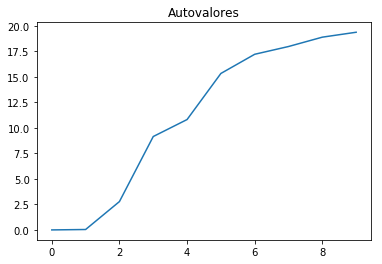

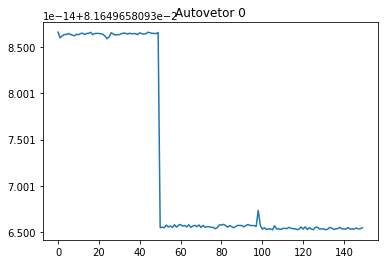

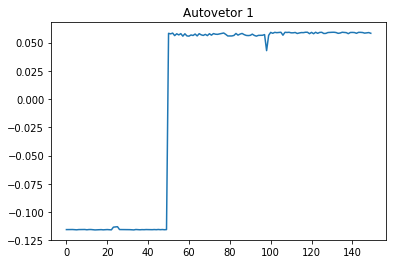

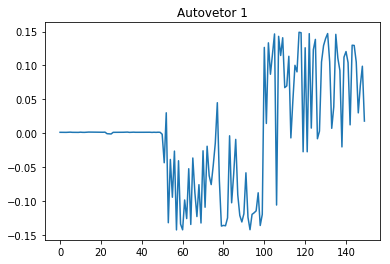

In [6]:
def plotArray(a, title = None):
    n = len(a)
    fig = plt.figure()
    if title is not None:
        plt.title(title)
    plt.plot(range(n), a, ls = '-')

# spectral decomposition
# computing eigenvalues of the (normalized) Laplacian
w, U = np.linalg.eigh(L)

# considering just firt k eigenvalues of L
U = U[:, :k]

plotArray(w[:10], 'Autovalores')
plotArray(U[:, 0], 'Autovetor 0')
plotArray(U[:, 1], 'Autovetor 1')
plotArray(U[:, 2], 'Autovetor 1')

In [7]:
# using python/sklearn spectral clustering
sc = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', n_neighbors=m)
sc.fit(x)

SpectralClustering(affinity='nearest_neighbors', assign_labels='kmeans',
          coef0=1, degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
          kernel_params=None, n_clusters=3, n_init=10, n_jobs=None,
          n_neighbors=30, random_state=None)

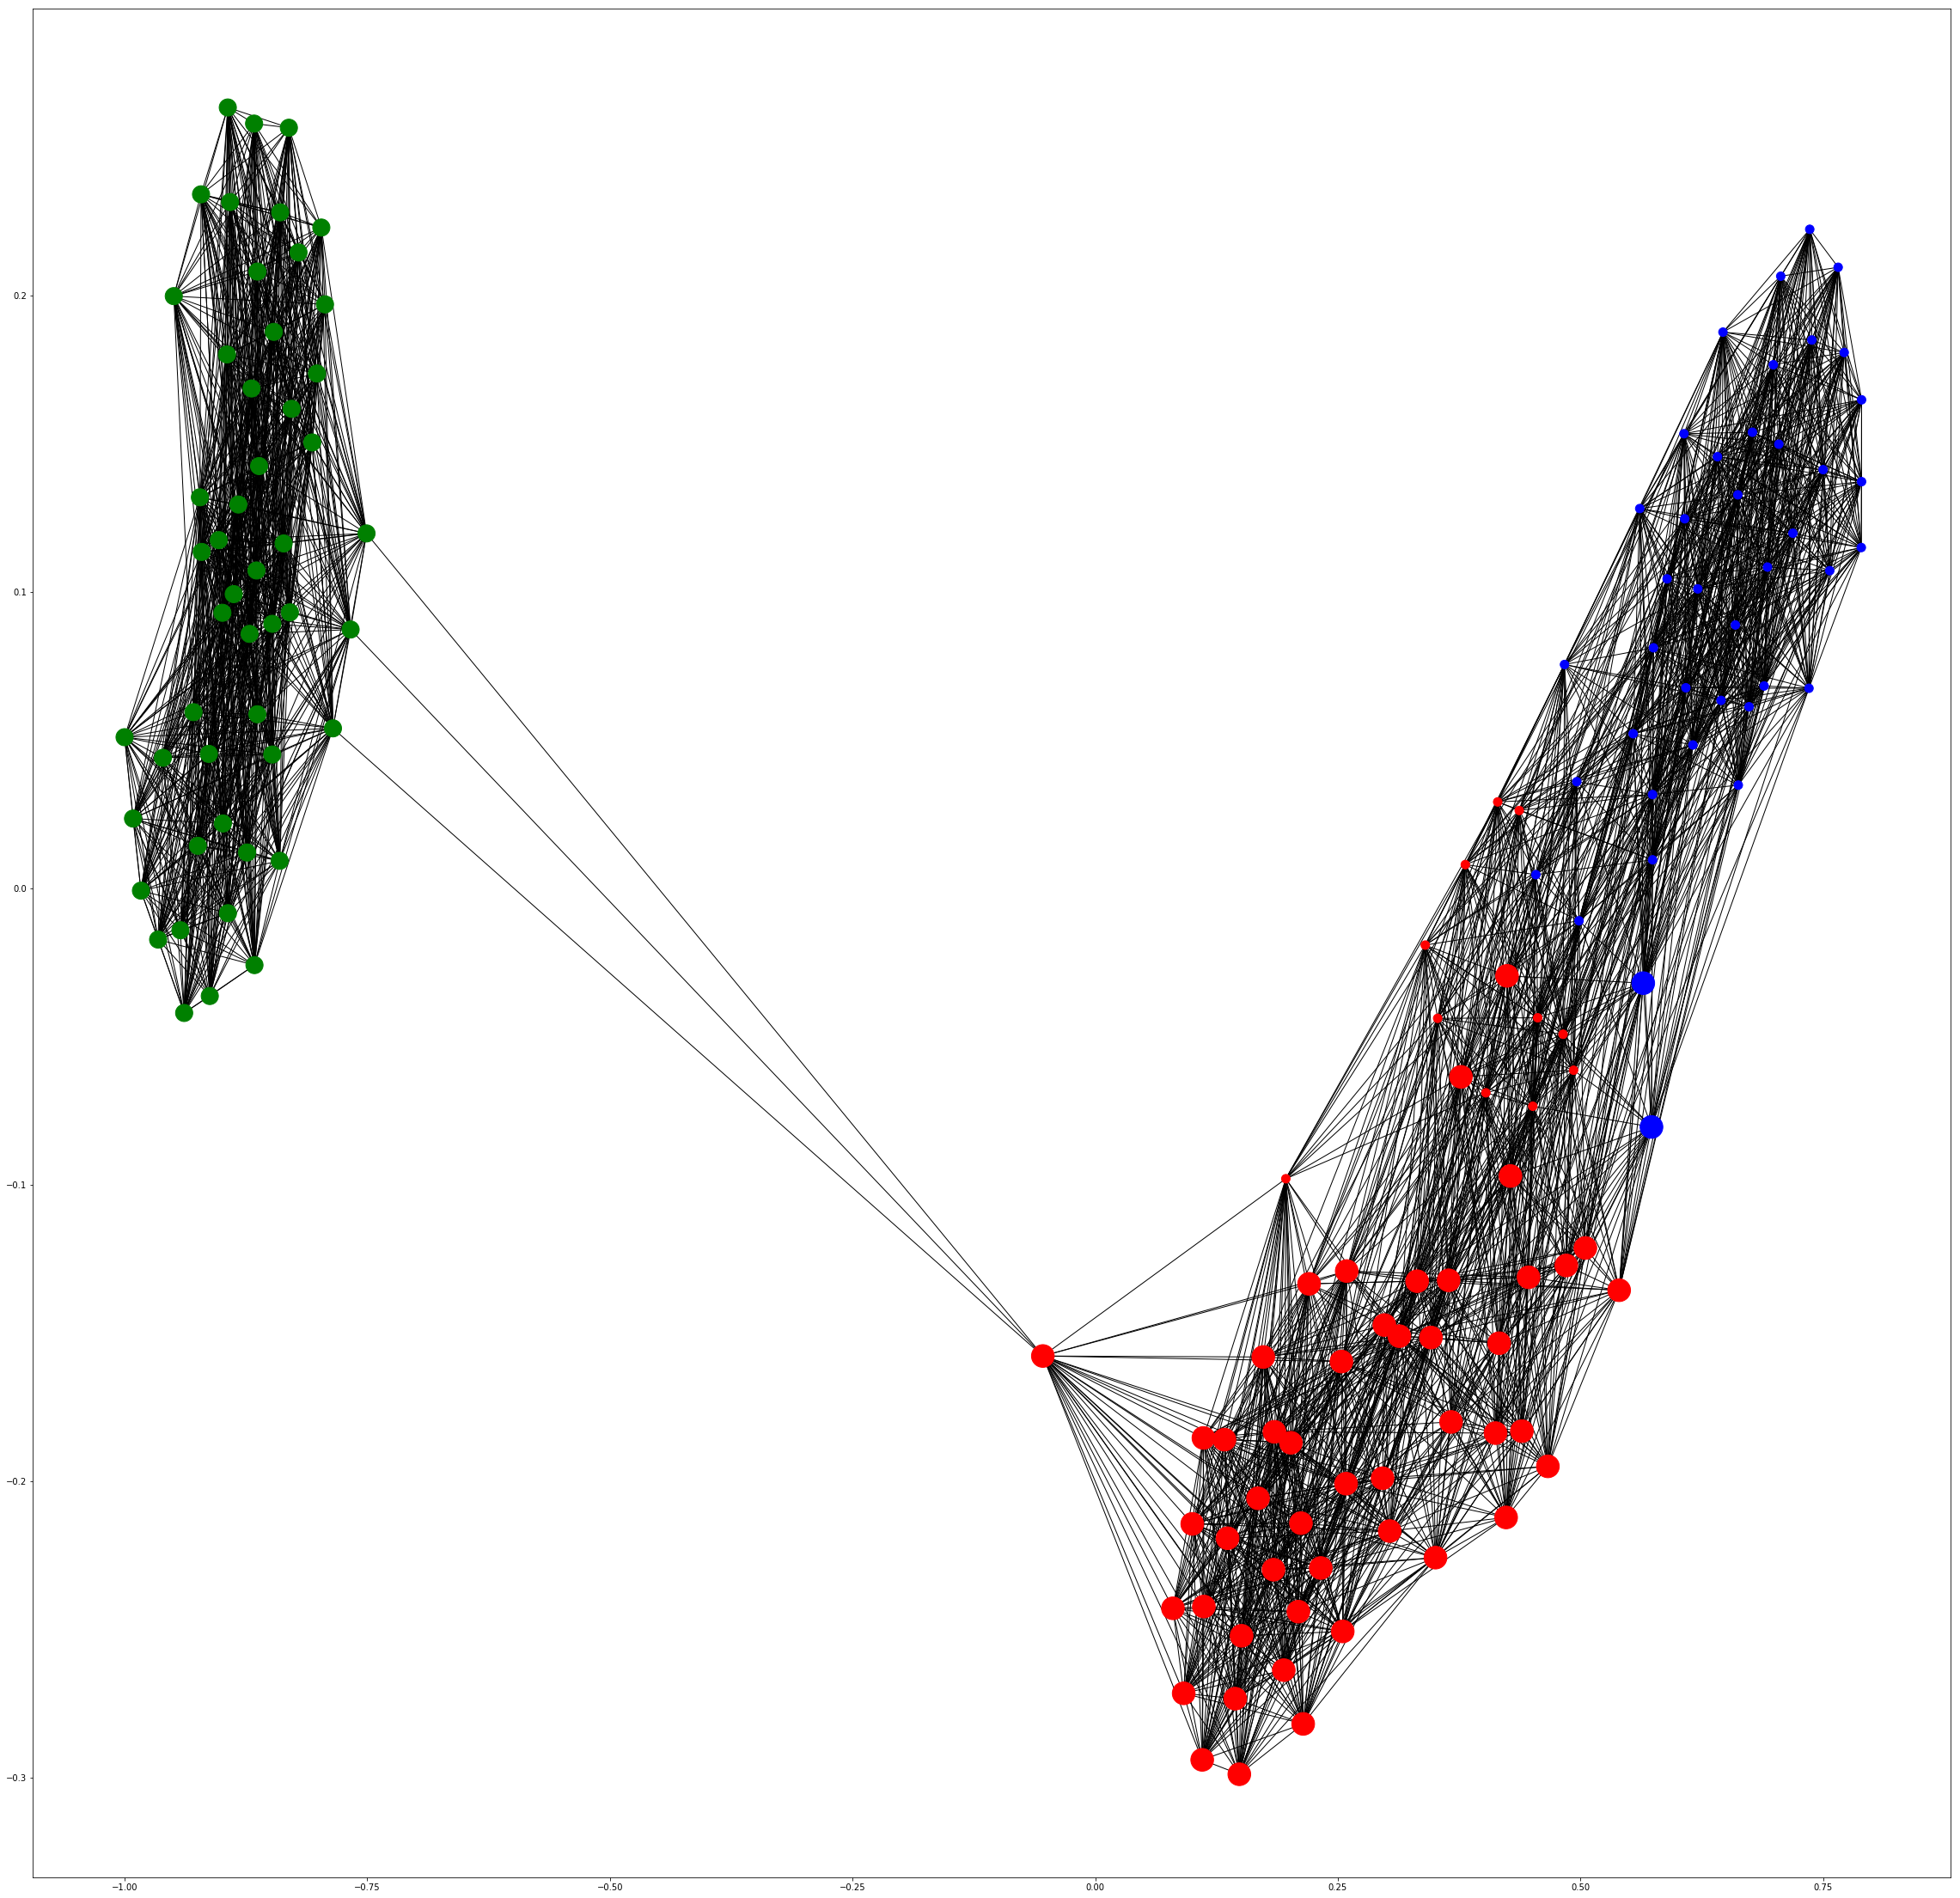

In [8]:
fig = plt.figure(figsize = (40, 40))
def getColor(s):
    if s == 0:
        return 'red'
    elif s == 1:
        return 'green'
    else:
        return 'blue'
def getSize(s):
    if s == 0:
        return 400
    elif s == 1:
        return 700
    else:
        return 100
sizes = [getSize(w) for w in iris[4]]
colors = [getColor(w) for w in sc.labels_]
nx.draw_networkx(g, node_color = colors, node_size = sizes, with_labels = False)
